In [1]:
# Load libraries
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
#import seaborn as sb



from sklearn import metrics, cross_validation, linear_model, ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import neural_network
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
#afficher les graphique ici dans le navigateur

import json
import codecs
from random import randint
from IPython.display import Image

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [10]:
dataProject_origine = pd.read_csv('train.csv')

In [2]:
dataProject_test = pd.read_csv('test.csv')

In [5]:
dataProject_origine.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [8]:
cols=dataProject_origine.columns.tolist()
sorted(cols)

['ID',
 'TARGET',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_imp_aport_var13_1y3',
 'delta_imp_aport_var17_1y3',
 'delta_imp_aport_var33_1y3',
 'delta_imp_compra_var44_1y3',
 'delta_imp_reemb_var13_1y3',
 'delta_imp_reemb_var17_1y3',
 'delta_imp_reemb_var33_1y3',
 'delta_imp_trasp_var17_in_1y3',
 'delta_imp_trasp_var17_out_1y3',
 'delta_imp_trasp_var33_in_1y3',
 'delta_imp_trasp_var33_out_1y3',
 'delta_imp_venta_var44_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1',
 'imp_aport_var13_hace3',
 'imp_aport_var13_ult1',
 'imp_aport_var17_h

In [2]:
#from IPython.display import Image
#Image(filename="feature_imporatnce.png")


In [6]:
imporatnce_features=['var38',
                     'var15',
                     'saldo_medio_var5_hace3',
                     'saldo_medio_var5_ult3',
                     'num_var45_ult3',
                     'num_var45_hace3',
                     'num_var45_hace2',
                     'num_var22_ult3',
                     'saldo_medio_var5_hace2',
                     'num_var45_ult1',
                     'num_med_var45_ult3',
                     'num_var22_hace3',
                     'saldo_var42',
                     'num_var22_hace2',
                     'saldo_medio_var5_ult1',
                     'saldo_var30',
                     'saldo_var5',
                     'num_meses_var5_ult3',
                     'var36',
                     'num_meses_var39_vig_ult3',
                     'num_var22_ult1',
                     'ind_var30',
                     'num_med_var22_ult3',
                     'num_var42',
                     'imp_op_var39_ult1',
                     'imp_op_var39_efect_ult3',
                     'imp_ent_var16_ult1',
                     'imp_op_var41_ult1',
                     'var3',
                     'imp_trans_var37_ult1',
                     ]
len(imporatnce_features)

30

In [11]:
Train=dataProject_origine[imporatnce_features+['TARGET']]
Test=dataProject_test[imporatnce_features]

In [12]:
Train.shape , Test.shape

((76020, 31), (75818, 30))

In [36]:
Train.to_csv("train_imp_features.csv")
Test.to_csv("test_imp_features.csv")

<font style="color:red;font-weight:bold;font-size:1.3em;">===============New Start, clear Memory=============</font>

In [13]:
TrainData=pd.read_csv('train_imp_features.csv',index_col=0)
TestData=pd.read_csv('test_imp_features.csv',index_col=0)

In [14]:
TrainData.shape, TestData.shape

((76020, 31), (75818, 30))

In [13]:
TrainData.head()

,var38,var15,saldo_medio_var5_hace3,saldo_medio_var5_ult3,num_var45_ult3,num_var45_hace3,num_var45_hace2,num_var22_ult3,saldo_medio_var5_hace2,num_var45_ult1,...,ind_var30,num_med_var22_ult3,num_var42,imp_op_var39_ult1,imp_op_var39_efect_ult3,imp_ent_var16_ult1,imp_op_var41_ult1,var3,imp_trans_var37_ult1,TARGET
0,39205.170000,23,0.00,0.00,0,0,0,0,0.00,0,...,0,0,0,0.0,0.0,0.0,0.0,2,0.0,0
1,49278.030000,34,88.89,0.00,0,0,0,0,0.00,0,...,1,0,0,0.0,0.0,0.0,0.0,2,0.0,0
2,67333.770000,23,0.18,2.07,0,0,0,0,3.00,0,...,1,0,3,0.0,0.0,0.0,0.0,2,0.0,0
3,64007.970000,37,0.00,138.84,48,3,27,3,186.09,18,...,1,0,3,195.0,0.0,0.0,195.0,2,0.0,0
4,117310.979016,39,0.30,13501.47,0,0,0,9,3.00,0,...,1,3,3,0.0,0.0,0.0,0.0,2,270003.0,0


In [15]:
TestData.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            75808, 75809, 75810, 75811, 75812, 75813, 75814, 75815, 75816,
            75817],
           dtype='int64', length=75818)

In [27]:
for col in TestData.columns.values:
    print "%30s"%col,", Nan in Train:",sum(TrainData[col].isnull()),len(TrainData[TrainData[col]==9999999999])," | in Test:",\
    sum(TestData[col].isnull()),len(TestData[TestData[col]==9999999999])

                         var38 , Nan in Train: 0 0  | in Test: 0 0
                         var15 , Nan in Train: 0 0  | in Test: 0 0
        saldo_medio_var5_hace3 , Nan in Train: 0 0  | in Test: 0 0
         saldo_medio_var5_ult3 , Nan in Train: 0 0  | in Test: 0 0
                num_var45_ult3 , Nan in Train: 0 0  | in Test: 0 0
               num_var45_hace3 , Nan in Train: 0 0  | in Test: 0 0
               num_var45_hace2 , Nan in Train: 0 0  | in Test: 0 0
                num_var22_ult3 , Nan in Train: 0 0  | in Test: 0 0
        saldo_medio_var5_hace2 , Nan in Train: 0 0  | in Test: 0 0
                num_var45_ult1 , Nan in Train: 0 0  | in Test: 0 0
            num_med_var45_ult3 , Nan in Train: 0 0  | in Test: 0 0
               num_var22_hace3 , Nan in Train: 0 0  | in Test: 0 0
                   saldo_var42 , Nan in Train: 0 0  | in Test: 0 0
               num_var22_hace2 , Nan in Train: 0 0  | in Test: 0 0
         saldo_medio_var5_ult1 , Nan in Train: 0 0  | in Test:

In [5]:
VALID_SIZE = 0.30 # 30% of train
HOLDOUT_SIZE = 0.33 # 33% of valid => 10% of train And it remains 66% of valid => 20% of train for the Vaidation
seed = 7
Y=TrainData.TARGET
X=TrainData.drop("TARGET",axis=1)
#X_test = dataset[:][dataset.index<len(TEST.index)]
X_train, X_valid, Y_train, Y_valid = cross_validation.train_test_split(X, Y, test_size=VALID_SIZE, random_state=seed)
X_valid,X_hold,Y_valid,Y_hold = cross_validation.train_test_split(X_valid, Y_valid, test_size=HOLDOUT_SIZE, random_state=seed)

In [6]:
print "Train     : ",X_train.shape, Y_train.shape, "     70% of Dataset", ":: TARGET distribution ",Y_train.value_counts().values
print "Validation: ",X_valid.shape, Y_valid.shape, "     20% of Dataset", ":: TARGET distribution ",Y_valid.value_counts().values
print "Holdout   : ",X_hold.shape, Y_hold.shape, "     10% of Dataset", ":: TARGET distribution ",Y_hold.value_counts().values


Train     :  (53214, 30) (53214,)      70% of Dataset :: TARGET distribution  [51106  2108]
Validation:  (15280, 30) (15280,)      20% of Dataset :: TARGET distribution  [14654   626]
Holdout   :  (7526, 30) (7526,)      10% of Dataset :: TARGET distribution  [7252  274]


In [8]:
X_train["TARGET"]=Y_train
X_valid["TARGET"]=Y_valid
X_hold["TARGET"]=Y_hold
X_train.to_csv("datas/train_final.csv")
X_valid.to_csv("datas/valid_final.csv")
X_hold.to_csv("datas/hold_final.csv")

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<font style="color:red;font-weight:bold;font-size:1.3em;">===============New Start, clear Memory=============</font>

In [3]:
TestData=pd.read_csv('test_imp_features.csv',index_col=0)
X_train=pd.read_csv('datas/train_final.csv',index_col=0)
X_valid=pd.read_csv('datas/valid_final.csv',index_col=0)
X_hold=pd.read_csv('datas/hold_final.csv',index_col=0)
Y_train,Y_valid,Y_hold=X_train.TARGET,X_valid.TARGET,X_hold.TARGET
X_train,X_valid,X_hold=X_train.drop("TARGET",axis=1),X_valid.drop("TARGET",axis=1),X_hold.drop("TARGET",axis=1)

In [5]:
print "Train     : ",X_train.shape, Y_train.shape, "     70% of Dataset", ":: TARGET distribution ",Y_train.value_counts().values
print "Validation: ",X_valid.shape, Y_valid.shape, "     20% of Dataset", ":: TARGET distribution ",Y_valid.value_counts().values
print "Holdout   : ",X_hold.shape, Y_hold.shape, "     10% of Dataset", ":: TARGET distribution ",Y_hold.value_counts().values

Train     :  (53214, 30) (53214,)      70% of Dataset :: TARGET distribution  [51106  2108]
Validation:  (15280, 30) (15280,)      20% of Dataset :: TARGET distribution  [14654   626]
Holdout   :  (7526, 30) (7526,)      10% of Dataset :: TARGET distribution  [7252  274]


<font style="color:blue;font-weight:bold;font-size:1.3em;">Finds the models with its parameters where the score is greater than 0.6 </font>

In [19]:
imporatnce_features=['var38',
                     'var15',
                     'saldo_medio_var5_hace3',
                     'saldo_medio_var5_ult3',
                     'num_var45_ult3',
                     'num_var45_hace3',
                     'num_var45_hace2',
                     'num_var22_ult3',
                     'saldo_medio_var5_hace2',
                     'num_var45_ult1',
                     'num_med_var45_ult3',
                     'num_var22_hace3',
                     'saldo_var42',
                     'num_var22_hace2',
                     'saldo_medio_var5_ult1',
                     'saldo_var30',
                     'saldo_var5',
                     'num_meses_var5_ult3',
                     'var36',
                     'num_meses_var39_vig_ult3',
                     'num_var22_ult1',
                     'ind_var30',
                     'num_med_var22_ult3',
                     'num_var42',
                     'imp_op_var39_ult1',
                     'imp_op_var39_efect_ult3',
                     'imp_ent_var16_ult1',
                     'imp_op_var41_ult1',
                     'var3',
                     'imp_trans_var37_ult1',
                     ]
len(imporatnce_features)

30

In [49]:
RAND_STATE=7
scoring = 'roc_auc'
N_TREES = 500

PARAM_GRID = {
    'LR': {'C': [10**x for x in range(-8,5)],
           'class_weight': ['balanced'],
           'penalty':['l2'],
           'solver' :['newton-cg', 'lbfgs', 'liblinear', 'sag'],
           'random_state':[RAND_STATE,],
    },
    
    'RFC': {
        'n_jobs': [3],
        'criterion':["gini","entropy"],
        "max_features":["sqrt",None],
        "max_depth":[180,200,None],
        "n_estimators":[500,1000],
        "min_samples_split":[2,5,10],
        "class_weight": ['balanced','balanced_subsample',None],
        'random_state':[RAND_STATE,],
    },
    'DTC': {#DecisionTreeClassifier
        "criterion":["gini","entropy"],
        "splitter":["best","random"],
        "max_features":["sqrt",None],
        "max_depth":[None,],
        "min_samples_split":[2,5,9,12,15],
        'class_weight': ['balanced',None],
        "presort":[False],
        'random_state':[RAND_STATE,],
    },
    'ETC': {'min_samples_leaf': [2, 3],#copie de ubuntu rush
                             'n_jobs': [5],
                             'min_samples_split': [1, 2, 5],
                             'bootstrap': [False],
                             'max_depth': [15, 20, 25, 30],
                             'max_features': [1, 3, 5, 8],
                             'random_state':[RAND_STATE,],
    },
    'GBC': {'max_features': [4, 5, 6, 7, 8],
            'learning_rate': [.05, .08, .1],
            'max_depth': [8, 10, 13],
            'random_state':[RAND_STATE,],
    },
    'SVC':{'C':[10**x for x in range(-7,4)],
           'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
           'gamma':['auto',0.5,0.7],
           'degree':[2,3],
           'class_weight': ['balanced',],
           'probability':[True,],
           'random_state':[RAND_STATE,],
          },
    'KNN':{ 'n_neighbors' : list({randint(1,500) for i in range(8)}),
            'weights' : ['uniform','distance'],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size' : [20,30,40,60],
            'metric' : ['minkowski',],
            #'n_jobs' :[2,],
            'p' : [1,2,7,10],
          },
    'NNC':{'solver' : ['lbfgs', 'sgd', 'adam'],
           'hidden_layer_sizes':[1,2,4,8,32,128],
           'activation':['identity', 'logistic', 'tanh', 'relu'],
           'alpha':[0.0001,0.005],#L2 penalty (regularization term) parameter.
           'batch_size':['auto'],#auto=min(200,n_samples)
           'learning_rate': ['constant', 'invscaling', 'adaptive'],
           #'momentu':[0,0.2,0.5,0.9], 
           'random_state':[RAND_STATE,],
    },
    'BAGC':{#BaggingClassifier
        'base_estimator':[DecisionTreeClassifier(),linear_model.LogisticRegression(),\
                          ensemble.GradientBoostingClassifier()],KNeighborsClassifier(),],
        'n_estimators':[10,20,100],
        'max_samples':[0.6,0.8],
        'max_features':[0.6,0.9],
        'n_jobs':[2,],
        'random_state':[RAND_STATE,],
        
    }
}

models= {
    'LR':  linear_model.LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'GBC': ensemble.GradientBoostingClassifier(),
    'RFC': ensemble.RandomForestClassifier(),
    'ETC': ensemble.ExtraTreesClassifier(),
    'SVC': SVC(),
    'NNC': neural_network.MLPClassifier(),
    'DTC': DecisionTreeClassifier(),
    'BAGC': ensemble.BaggingClassifier(),
    
}

In [50]:

def generer20Feature():
    """Random 20 features"""
    nb=len(imporatnce_features)
    a=set()
    while len(a)<=20:
        a.add(randint(0,nb-1))
    return list(a)

In [51]:
#generation and stock the different combinaisons of features has a length 20 
#X_train[(10,11,1,2,29)]
for i in range(5):
    print generer20Feature()

[1, 3, 4, 5, 7, 8, 11, 13, 14, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29]
[0, 2, 3, 6, 7, 8, 9, 10, 11, 12, 14, 16, 18, 19, 21, 22, 24, 25, 27, 28, 29]
[0, 1, 2, 3, 6, 7, 8, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 26, 28, 29]
[0, 1, 2, 4, 7, 8, 9, 11, 12, 13, 14, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28]
[0, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 18, 20, 21, 22, 23, 24, 25, 26, 29]


In [52]:
def generatorParameters(algoName):
    """Combinaisons of parameters"""
    params=PARAM_GRID[algoName]
    prms=dict()
    ch="""def genarator_parameters(nameAlgo):
    params=PARAM_GRID[nameAlgo]
    prms=dict()
    
    """
    i=0
    for key,val in params.items():
        ch+='\t'*i
        ch+="""for """+key+""" in params['"""+key+"""']:
        """+('\t'*(i+1))+"""prms['"""+key+"""']="""+key+"""
            """
        i+=1
    ch+='\t'*i
    ch+="""yield prms
    """
    ch+='\t'*(i+1)
    #ch+="""prms=dict()"""
    exec(ch)
    return genarator_parameters(algoName)
    
for pr in generatorParameters('GBC'):
    print pr
        
 

{'max_features': 4, 'learning_rate': 0.05, 'random_state': 7, 'max_depth': 8}
{'max_features': 4, 'learning_rate': 0.05, 'random_state': 7, 'max_depth': 10}
{'max_features': 4, 'learning_rate': 0.05, 'random_state': 7, 'max_depth': 13}
{'max_features': 4, 'learning_rate': 0.08, 'random_state': 7, 'max_depth': 8}
{'max_features': 4, 'learning_rate': 0.08, 'random_state': 7, 'max_depth': 10}
{'max_features': 4, 'learning_rate': 0.08, 'random_state': 7, 'max_depth': 13}
{'max_features': 4, 'learning_rate': 0.1, 'random_state': 7, 'max_depth': 8}
{'max_features': 4, 'learning_rate': 0.1, 'random_state': 7, 'max_depth': 10}
{'max_features': 4, 'learning_rate': 0.1, 'random_state': 7, 'max_depth': 13}
{'max_features': 5, 'learning_rate': 0.05, 'random_state': 7, 'max_depth': 8}
{'max_features': 5, 'learning_rate': 0.05, 'random_state': 7, 'max_depth': 10}
{'max_features': 5, 'learning_rate': 0.05, 'random_state': 7, 'max_depth': 13}
{'max_features': 5, 'learning_rate': 0.08, 'random_state': 

In [53]:
def execAlgo(ALGO,set_features,parameters,file_json,indice,prefix_id="",score_seuil=0.5):
    """Exec one classifier with a combinaison of parameters and on a dataset, and save the resuts in a json File.
       parameters: one parameters combinaison
       set_features: dataset
    """
    score=0
    try:
        ALGO.set_params(**parameters)
        ALGO.fit(X_train[set_features],Y_train)
        ALGO_preds = ALGO.predict_proba(X_valid[set_features])[:, 1]
        fpr,tpr,ll=metrics.roc_curve(Y_valid, ALGO_preds)
        score=metrics.auc(fpr, tpr)
        #print score,":",set_features
        if score>=score_seuil:#si >=score_seuil on stock
            params=parameters
            idd=prefix_id+"_"+str(indice)
            obj_json=dict()
            obj_json["id"]=idd
            obj_json["score"]=score
            obj_json["features"]=set_features
            obj_json["valid"]=ALGO_preds#ALGO.predict(X_valid[set_features]).tolist()
            obj_json["hold"]=ALGO.predict_proba(X_hold[set_features])[:, 1]#ALGO.predict(X_hold[set_features]).tolist()
            obj_json["test"]=ALGO.predict_proba(TestData[set_features])[:, 1]#ALGO.predict(TestData[set_features]).tolist()
            if type(ALGO)==type(ensemble.BaggingClassifier()):
                #prob de parameter 'base_estimator' is Not Serializable
                #we have been stocked the estimator class name
                params={i:j for i,j in parameters.items() if i!='base_estimator'}
                params['base_estimator']=str(parameters['base_estimator'].__class__).split("'")[1].split(".")[-1]
                print params['base_estimator']," score:",score
            obj_json["params"]=params
            json.dump(obj=obj_json,fp=file_json,indent=5)
            file_json.flush()
            indice+=1#rise the number of classifier
    except Exception as e:
        print e
    return indice,score#return the next position of next classifier, and score

In [54]:
def run_stock_for_algo(model_name,thresholds_score=0.6):
    """Run a classifier for each parameters combinaison and two differents datasets (All features, 20 Random features )"""
    with open("results/"+model_name+".amh","a") as dtOut:#results file
        seuil_score=thresholds_score
        #obj_json=dict()
        indice,min_score,max_score=1,1,0
        ALGO=models[model_name]
        all_features=list(range(len(imporatnce_features)))
        for parameters in generatorParameters(model_name):
            j=indice
            set_features=generer20Feature()
            indice,score=execAlgo(ALGO,all_features,parameters,dtOut,indice,model_name,seuil_score)
            min_score=score if score<min_score and indice>j else min_score
            max_score=score if score>max_score and indice>j else max_score
            j=indice
            indice,score=execAlgo(ALGO,set_features,parameters,dtOut,indice,model_name,seuil_score)
            min_score=score if score<min_score and indice>j else min_score
            max_score=score if score>max_score and indice>j else max_score
        #json.dump(obj=obj_json,fp=dtOut,indent=5)
        dtOut.flush()
        print indice-1, "Classifier :"+model_name,"  with the scores between:",min_score,"and ",max_score

In [13]:
#---------------DecisionTreeClassifier--------# Lenovo-Majid-PC #DONE
model_name="DTC"
run_stock_for_algo(model_name)

102 Classifier :DTC   with the scores between: 0.600081278444 and  0.68998302048


In [19]:
#---------------LogisticRegression--------# Lenovo-Majid-PC #DONE
model_name="LR"
run_stock_for_algo(model_name)

104 Classifier :LR   with the scores between: 0.63680641341 and  0.76521583482


In [ ]:
#---------------KNeighborsClassifier--------# HP-Prof-PC #
model_name="KNN"
run_stock_for_algo(model_name)

In [ ]:
# ---------------RandomForestClassifier--------# HP-Majid-PC #
model_name="RFC"
run_stock_for_algo(model_name)

In [ ]:
# ---------------ExtraTreesClassifier--------# Ubuntu-rush #
model_name="ETC"
run_stock_for_algo(model_name,0.6)

In [48]:
# ---------------BaggingClassifier--------#1 Lenovo-Majid-PC #Done
model_name="BAGC"
run_stock_for_algo(model_name,0.6)

DecisionTreeClassifier  score: 0.689585567146
DecisionTreeClassifier  score: 0.667273893094
DecisionTreeClassifier  score: 0.650940806706
DecisionTreeClassifier  score: 0.601933753272
DecisionTreeClassifier  score: 0.718905708285
DecisionTreeClassifier  score: 0.710249434125
DecisionTreeClassifier  score: 0.702953124053
DecisionTreeClassifier  score: 0.70311042662
DecisionTreeClassifier  score: 0.748118255775
DecisionTreeClassifier  score: 0.747726089465
DecisionTreeClassifier  score: 0.736280828796
DecisionTreeClassifier  score: 0.719522763851
LogisticRegression  score: 0.706838922607
LogisticRegression  score: 0.625391784773
LogisticRegression  score: 0.666957925324
LogisticRegression  score: 0.670664292121
GradientBoostingClassifier  score: 0.809536514472
GradientBoostingClassifier  score: 0.787786027956
GradientBoostingClassifier  score: 0.826803496281
GradientBoostingClassifier  score: 0.818822271427
GradientBoostingClassifier  score: 0.81352451064
GradientBoostingClassifier  scor

In [55]:
# ---------------BaggingClassifier--------#2 Lenovo-Majid-PC
model_name="BAGC"
run_stock_for_algo(model_name,0.6)

DecisionTreeClassifier  score: 0.725426406599
DecisionTreeClassifier  score: 0.717623305373
DecisionTreeClassifier  score: 0.726479559823
DecisionTreeClassifier  score: 0.732883017035
DecisionTreeClassifier  score: 0.762728372151
DecisionTreeClassifier  score: 0.757990654287
DecisionTreeClassifier  score: 0.756925891414
DecisionTreeClassifier  score: 0.751010148468
DecisionTreeClassifier  score: 0.789201260514
DecisionTreeClassifier  score: 0.768702653889
DecisionTreeClassifier  score: 0.7782173335
DecisionTreeClassifier  score: 0.779488181268
LogisticRegression  score: 0.660268859847
GradientBoostingClassifier  score: 0.819818630031
GradientBoostingClassifier  score: 0.793175957365
GradientBoostingClassifier  score: 0.828112007277
GradientBoostingClassifier  score: 0.822696950881
GradientBoostingClassifier  score: 0.819944210459
GradientBoostingClassifier  score: 0.75632431538
GradientBoostingClassifier  score: 0.829053587959
GradientBoostingClassifier  score: 0.762101287592
GradientB

In [ ]:
# ---------------ensemble.GradientBoostingClassifier()--------#
model_name="GBC"
run_stock_for_algo(model_name)

In [ ]:
# ---------------neural_network.MLPClassifier--------#
model_name="NNC"
run_stock_for_algo(model_name)
#ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# ---------------SVC--------# Prof-HP-PC #
model_name="SVC"
run_stock_for_algo(model_name)

In [15]:
[10**x for x in range(-8,5)]

[1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

<font style="color:red;font-weight:bold;font-size:1.3em;">===============New Start, clear Memory=============</font>

<font style="color:blue;font-weight:bold;font-size:1.2em;">Upload results files, and construct new dataset </font>

In [ ]:
#standarized the files
i=2
with open("results/rushHpPC/ETC.amh","r") as fi:
    with open("results/rushHpPC/ETC2.amh","w") as fo:
        lines=["{","\"ETC_1\":"]
        for line in fi:
            if "}{" in line:
                lines.append("},")
                fo.writelines(lines)
                lines=["\"ETC_"+str(i)+"\":{"]
                i+=1
            else:
                lines.append(line)
        lines.append("}")
        fo.writelines(lines)
#Done

In [ ]:
# The best 228 classifiers "ExtraTreesClassifier" score >0.78
b=load_json_objcet("results/AbdelmajidLenovoPC/ETC.amh")
clsEtc={key:cls for key,cls in b.items() if cls['score']>0.78}
with open("results/AbdelmajidLenovoPC/ETC228.amh","w") as f:
    json.dump(clsEtc,f)
len(clsEtc)

Construction the datasets

In [2]:
result_valid=pd.DataFrame()
result_hold=pd.DataFrame()
result_test=pd.DataFrame()

In [9]:
#==========
def load_json_objcet(file_path):
    """Method return an object or objects from the file"""
    try:
        with open(file_path, 'r') as f:
            return json.load(f,encoding='utf8')
    except Exception as e:
        print "Exception load Json: ",file_path,"::",e
        return None

In [4]:
def go_load(file_path, result_valid, result_hold, result_test):
    """Load the classifiers results and construct the new datasets"""
    classifiers=load_json_objcet(file_path)
    for idd,classifier in classifiers.items():
        if result_valid is not None:result_valid[idd]=classifier['valid']
        if result_hold is not None:result_hold[idd]=classifier['hold']
        if result_test is not None:result_test[idd]=classifier['test']

In [6]:
b=load_json_objcet("results/resultsProba/GBC2.amh")

122

<font style="color:green;font-size:1.2em;"> <<<<<===== New data set =====>>>>>> </font>

In [5]:
paths=[
       "results/resultsProba/ETC2.amh", # in Test => prat 1
       "results/resultsProba/RFC2.amh", # in Test => prat 2
       "results/resultsProba/BAGC2.amh", # in Test => prat 2
       "results/resultsProba/DTC2.amh", # in Test => prat 2
       "results/resultsProba/LR2.amh", # in Test => prat 3
       "results/resultsProba/KNN2.amh", # in Test => prat 3
       "results/resultsProba/GBC2.amh", # in Test => prat 3
      ] 


In [7]:
# Vaildation Proba
for path in paths:
    go_load(path, result_valid, result_hold=None, result_test=None)

In [7]:
result_valid.to_csv("results/result_proba_valid.csv")

In [ ]:
# Holding proba
for path in paths:
    go_load(path, result_valid=None, result_hold=result_hold, result_test=None)

In [6]:
result_hold.to_csv("results/result_proba_hold.csv")

In [6]:
# Test proba
for path in paths:
    go_load(path, result_valid=None, result_hold=None, result_test=result_test)

In [ ]:
result_test.to_csv("results/result_proba_test1.csv")# 1 part ETC 
result_test.to_csv("results/result_proba_test2.csv")# 2 part RFC,BAGC and DTC
result_test.to_csv("results/result_proba_test3.csv")# 3 part LR, KNN and GBC

In [2]:
#=====================================
# On va faire la stepwise sur la validation et Holding.
# apres on va savoir les colonnes q'on va utilser. et on les recupere depuis Test1 et Test2.
# et on va construire le jeu de test avec seulement les colonnes qu'on a obtient. et on fait l'etape de 
# prediction => submit le resultat

#Test1=pd.read_csv("results/result_test1.csv",index_col=0)
#Test2=pd.read_csv("results/result_test1.csv",index_col=0)

In [2]:
#(pd.read_csv("results/result_test1.csv",index_col=0)+pd.read_csv("results/result_test1.csv",index_col=0))\
#.to_csv("results/result_test.csv")

<font style="color:blue;font-size:1.1em;"> SetpWise </font>

In [17]:
#-----------------Done------

X_validation=pd.read_csv("results/result_proba_valid.csv")
X_holding=pd.read_csv("results/result_proba_hold.csv")

Y_validation=pd.read_csv('datas/valid_final.csv')['TARGET']
Y_holding=pd.read_csv('datas/hold_final.csv')['TARGET']
X_validation['TARGET']=Y_validation
X_holding['TARGET']=Y_holding

#stocker les dataframes de validation et de holding avec le TARGET
X_validation.to_csv("results/result_proba_valid_target.csv")

X_holding.to_csv("results/result_proba_hold_target.csv")

#------------------Done

In [18]:
X_validation.head()

,Unnamed: 0,RFC_168,RFC_169,RFC_162,RFC_163,RFC_160,RFC_161,RFC_166,RFC_167,RFC_164,...,GBC_48,GBC_47,GBC_46,GBC_45,GBC_44,GBC_43,GBC_42,GBC_41,GBC_40,TARGET
0,0,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0
2,2,0.01,0.00,0.00,0.00,0.05,0.01,0.00,0.00,0.03,...,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0
3,3,0.00,0.16,0.12,0.16,0.00,0.12,0.76,0.04,0.76,...,0.15,0.10,0.15,0.10,0.03,0.07,0.11,0.09,0.10,1
4,4,0.09,0.09,0.07,0.09,0.15,0.07,0.18,0.05,0.11,...,0.01,0.01,0.05,0.05,0.08,0.16,0.02,0.02,0.06,0


<font style="color:red;font-size:1.3em;"> The last start :O , The stepwise is Here </font>

In [3]:
X_validation=pd.read_csv("results/result_proba_valid_target.csv",index_col=0)
X_holding=pd.read_csv("results/result_proba_hold_target.csv",index_col=0)

Y_validation=X_validation['TARGET']
Y_holding=X_holding['TARGET']

X_validation=X_validation.drop('TARGET',axis=1)
X_holding=X_holding.drop('TARGET',axis=1)

In [3]:
"Xvalid:",X_validation.shape,"Yvalid:",Y_validation.shape," - ","Xhold:",X_holding.shape,"Yhold:",Y_holding.shape

('Xvalid:',
 (15280, 1036),
 'Yvalid:',
 (15280,),
 ' - ',
 'Xhold:',
 (7526, 1036),
 'Yhold:',
 (7526,))

In [4]:
X_validation.head()

,Unnamed: 0.1,RFC_168,RFC_169,RFC_162,RFC_163,RFC_160,RFC_161,RFC_166,RFC_167,RFC_164,...,GBC_49,GBC_48,GBC_47,GBC_46,GBC_45,GBC_44,GBC_43,GBC_42,GBC_41,GBC_40
0,0,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
2,2,0.01,0.00,0.00,0.00,0.05,0.01,0.00,0.00,0.03,...,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00
3,3,0.00,0.16,0.12,0.16,0.00,0.12,0.76,0.04,0.76,...,0.08,0.15,0.10,0.15,0.10,0.03,0.07,0.11,0.09,0.10
4,4,0.09,0.09,0.07,0.09,0.15,0.07,0.18,0.05,0.11,...,0.07,0.01,0.01,0.05,0.05,0.08,0.16,0.02,0.02,0.06


In [5]:
X_holding.head()

,Unnamed: 0.1,RFC_168,RFC_169,RFC_162,RFC_163,RFC_160,RFC_161,RFC_166,RFC_167,RFC_164,...,GBC_49,GBC_48,GBC_47,GBC_46,GBC_45,GBC_44,GBC_43,GBC_42,GBC_41,GBC_40
0,0,0.0,0.12,0.03,0.12,0.01,0.01,0.15,0.03,0.06,...,0.02,0.01,0.00,0.02,0.02,0.01,0.02,0.01,0.01,0.02
1,1,0.0,0.02,0.05,0.02,0.00,0.07,0.54,0.02,0.54,...,0.02,0.04,0.02,0.04,0.02,0.03,0.02,0.02,0.02,0.02
2,2,0.2,0.07,0.08,0.07,0.08,0.08,0.05,0.17,0.10,...,0.03,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.01,0.01
3,3,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
4,4,0.0,0.18,0.16,0.18,0.00,0.04,0.81,0.05,0.82,...,0.25,0.17,0.19,0.19,0.23,0.12,0.26,0.21,0.21,0.23


In [7]:
x=X_validation.RFC_1
y=X_validation.RFC_2
#x+y

The models score in file

In [3]:
#################################### Done ####### don't run this
# sort the classifiers by score
paths=[
       "results/resultsProba/ETC2.amh", # in Test => prat 1
       "results/resultsProba/RFC2.amh", # in Test => prat 2
       "results/resultsProba/BAGC2.amh", # in Test => prat 2
       "results/resultsProba/DTC2.amh", # in Test => prat 2
       "results/resultsProba/LR2.amh", # in Test => prat 3
       "results/resultsProba/KNN2.amh", # in Test => prat 3
       "results/resultsProba/GBC2.amh", # in Test => prat 3
      ]
score_classifiers=[]
for path in paths:
    with open(path,"r") as f:
        classifiers=load_json_objcet(path)
        for idd,cls in classifiers.items():
            score=cls["score"]
            score_classifiers.append(idd+":"+str(score)+"\n")
with open("results/resultsProba/scoresClassifiers.txt","w") as fo:
    fo.writelines(score_classifiers)

#################################### Done ####### don't run this

Sort the classifiers by its scores auc, used in K_best models in stepWise

In [ ]:
#################################### Done ####### don't run this

sorted_classifiers=["None:0.0",]
with open("results/resultsProba/scoresClassifiers.txt","r") as fi:
    for line in fi:
        cls,score=line.split(":")
        score=score[:-1]
        for i in range(len(sorted_classifiers)):
            if float(score)>= float(sorted_classifiers[i].split(":")[1]):
                sorted_classifiers.insert(i,line[:-1])
                #print sorted_classifiers
                break
print "Fin, stock..."
with open("sresults/resultsProba/ortedClassifiers.txt","w") as fo:
    fo.writelines("\n".join(sorted_classifiers[:-1]))
print "Fin"

#################################### Done ####### don't run this

Our StepWise Implementation

In [3]:
import math
class StepWiseAMH:
    """StepWise implementation"""
    
    all_models=X_validation.columns # All models
    
    #==========================================================#
    def __init__(self,k_best=5,max_models=40,epslon=0.01,random=False):
        self.random=random # if true select k_best random models, else k_best best models in initial step
        self.k_best=k_best # Number of models in the nitial ensemble
        self.max_models=max_models # number maximal of models in ensemble
        self.epslon=epslon # if new_score - old_score is positif and less than epsilon ==> stop
        self.ensemble_models=dict() # {"model_name":weight}
        self.scores_ensemble=[(dict(),0.0,0.0),] # the auc score of the current ensemble for validation and holding 
    
    #==========================================================#
    def run(self):
        """Run the StepWise"""
        if not self.random:
            self.ensemble_models= self.the_k_best_models() # get the k best models
        else:
            self.ensemble_models= self.select_random_k_models() # get the k random models
        scv,sch=self.get_score_ensemble()
        self.scores_ensemble.append((self.ensemble_models.copy(),scv,sch))
        
        while True:
            md=self.select_one_model() # Add Model
            print "Add model -",md,"- ensemble and score:",self.scores_ensemble[-1]
            if md is None:
                print "Stop no model can increase score --------------"
                break
            
            last_score1= self.scores_ensemble[-1][1]
            last_score2= self.scores_ensemble[-2][1]
            #print last_score1,last_score2,"eps",math.fabs(last_score1-last_score2)
            if math.fabs(last_score1-last_score2)<=self.epslon:
                print "Stop epsilon  -------------------"
                #break
                
            
            self.eliminate_one_model() # eliminate Model
            print "Elminate models -- ensemble and score:",self.scores_ensemble[-1]
            
            if len(self.ensemble_models.keys())>self.max_models:
                print "Stop max models ",self.max_models,"models ----------"
                break
        
    #==========================================================#
    def get_score_ensemble(self):
        """get validation and holding score"""
        probs_v,probs_h = None,None
        number_models=sum(self.ensemble_models.values())
        for model,weight in self.ensemble_models.items():
            if probs_v is None:
                probs_v=X_validation[model]*weight
            else:
                probs_v+=X_validation[model]*weight
            if probs_h is None:
                probs_h=X_holding[model]*weight
            else:
                probs_h+=X_holding[model]*weight
        #print "number",float(number_models)
        probs_v,probs_h = probs_v/float(number_models), probs_h/float(number_models)
        #print "is Nan",np.any(np.isnan(Y_validation))
        #print "is Inf",np.all(np.isfinite(Y_validation))
        fprv,tprv,llv=metrics.roc_curve(Y_validation, probs_v)
        score_v=metrics.auc(fprv, tprv)
        fprh,tprh,llh=metrics.roc_curve(Y_holding, probs_h)
        score_h=metrics.auc(fprh, tprh)
        
        return score_v,score_h
    
    #==========================================================#
    def select_one_model(self):
        """Method add a model wich maximize score: StepWise Selection"""
        choose_model=None
        score_max= self.scores_ensemble[-1][1]
        scr_v,scr_h=0,0
        
        for model in StepWiseAMH.all_models:
            self.add_model_in_ensemble(model)       # add model
            scr_vt,scr_ht=self.get_score_ensemble()
            if scr_vt>score_max:
                choose_model=model
                scr_v,scr_h=scr_vt,scr_ht
            
            self.delete_model_from_ensemble(model)  # delete the model
        
        if choose_model is not None:
            self.add_model_in_ensemble(choose_model)
            self.scores_ensemble.append((self.ensemble_models.copy(),scr_v,scr_h))# for the curve revolution score
        
        return choose_model
    
    #==========================================================#
    def eliminate_one_model(self):
        """Method elemine a model wich maximize score: StepWise Elemination"""
        models=self.ensemble_models.keys()
        choose_model=None
        score_max= self.scores_ensemble[-1][1]
        scr_v,scr_h=0,0
        
        if len(models)<2:
            return
        for model in models:
            ret=self.delete_model_from_ensemble(model,weighted=True)  # delete model
            scr_vt,scr_ht=self.get_score_ensemble()
            if scr_vt>score_max:
                choose_model=model
                scr_v,scr_h=scr_vt,scr_ht
            self.add_model_in_ensemble(model,weight=ret[1])      # add the model
            
        if choose_model is not None:
            ret=self.delete_model_from_ensemble(choose_model,weighted=True)
            self.scores_ensemble.append((self.ensemble_models.copy(),scr_v,scr_h))# for the curve revolution score
            
            self.eliminate_one_model() # continue elemination ...
        
    
    
    #==========================================================#
    def add_model_in_ensemble(self, model,weight=1):
        """Add a model in ensemble"""
        
        if model in self.ensemble_models:
            self.ensemble_models[model]+=1
        else:
            self.ensemble_models[model]=weight
                    
    #==========================================================#
    def delete_model_from_ensemble(self,model,weighted=False):
        """Delete one model"""
        if model in self.ensemble_models:
            if weighted==True:
                ret=(model,self.ensemble_models[model]) #return (model, weight)
                del self.ensemble_models[model]
                return ret
            if self.ensemble_models[model]>1:
                self.ensemble_models[model]-=1
            else:
                del self.ensemble_models[model]
    
    #==========================================================#
    def the_k_best_models(self):
        """Get the k best models by score auc"""
        ensemble=dict()
        with open("results/resultsProba/sortedClassifiers.txt","r") as fin:
            i=1
            for line in fin:
                model=line.split(":")[0]
                ensemble[model]=1
                if i>=self.k_best:
                    break
                i+=1
        return ensemble
    
    #==========================================================#
    def select_random_k_models(self):
        """Get the k random models"""
        ensemble=dict()
        n=len(StepWiseAMH.all_models)
        while len(ensemble) < self.k_best:
            ensemble[StepWiseAMH.all_models[randint(0,n-1)]]=1
        return ensemble
        
        
  
              

In [69]:
myStep=StepWiseAMH(k_best=7,max_models=200,epslon=0.00,random=False)

In [70]:
myStep.the_k_best_models()

{'BAGC_19': 1,
 'GBC_1': 1,
 'GBC_109': 1,
 'GBC_113': 1,
 'GBC_114': 1,
 'GBC_93': 1,
 'GBC_97': 1}

In [71]:
#Y_holding_re=np.reshape(Y_holding,(Y_holding.shape[0],1))
#Y_validation_re=np.reshape(Y_validation,(Y_validation.shape[0],1))
myStep.run()

Add model - GBC_112 - ensemble and score: ({'GBC_109': 1, 'GBC_114': 1, 'GBC_97': 1, 'GBC_112': 1, 'GBC_113': 1, 'BAGC_19': 1, 'GBC_1': 1, 'GBC_93': 1}, 0.83170347670286837, 0.83556939741767688)
Elminate models -- ensemble and score: ({'GBC_109': 1, 'GBC_114': 1, 'GBC_1': 1, 'GBC_93': 1}, 0.83226613588587184, 0.83359360216763767)
Add model - GBC_115 - ensemble and score: ({'GBC_109': 1, 'GBC_114': 1, 'GBC_115': 1, 'GBC_1': 1, 'GBC_93': 1}, 0.8326271251108095, 0.83335430246274877)
Elminate models -- ensemble and score: ({'GBC_1': 1, 'GBC_114': 1, 'GBC_115': 1, 'GBC_93': 1}, 0.83263889827592896, 0.8330151058253249)
Add model - GBC_107 - ensemble and score: ({'GBC_1': 1, 'GBC_114': 1, 'GBC_115': 1, 'GBC_107': 1, 'GBC_93': 1}, 0.83264522090164117, 0.83298113583567179)
Elminate models -- ensemble and score: ({'GBC_1': 1, 'GBC_114': 1, 'GBC_115': 1, 'GBC_107': 1, 'GBC_93': 1}, 0.83264522090164117, 0.83298113583567179)
Add model - GBC_117 - ensemble and score: ({'GBC_1': 1, 'GBC_107': 1, 'GBC

In [73]:

with open("resultStepwise.amh","w") as fo:
    json.dump(obj=myStep.scores_ensemble,fp=fo,indent=5)
    fo.flush()

In [80]:
myStep_rand=StepWiseAMH(k_best=7,max_models=200,epslon=0.00,random=True)

In [81]:
myStep_rand.run()

Add model - GBC_40 - ensemble and score: ({'GBC_98': 1, 'RFC_212': 1, 'GBC_62': 1, 'BAGC_28': 1, 'GBC_40': 1, 'DTC_83': 1, 'BAGC_62': 1, 'RFC_12': 1}, 0.78562537963006962, 0.78872603983396472)
Elminate models -- ensemble and score: ({'GBC_98': 1, 'GBC_40': 1}, 0.82726183213995597, 0.82757185533515054)
Add model - GBC_43 - ensemble and score: ({'GBC_43': 1, 'GBC_98': 1, 'GBC_40': 1}, 0.82770081858381028, 0.82900664704627181)
Elminate models -- ensemble and score: ({'GBC_43': 1, 'GBC_98': 1, 'GBC_40': 1}, 0.82770081858381028, 0.82900664704627181)
Add model - GBC_111 - ensemble and score: ({'GBC_43': 1, 'GBC_111': 1, 'GBC_98': 1, 'GBC_40': 1}, 0.82842437769011379, 0.83017068535838079)
Elminate models -- ensemble and score: ({'GBC_43': 1, 'GBC_98': 1, 'GBC_111': 1}, 0.82876601750015577, 0.83101867695194076)
Add model - GBC_111 - ensemble and score: ({'GBC_43': 1, 'GBC_98': 1, 'GBC_111': 2}, 0.82907898747291631, 0.83095400815682352)
Elminate models -- ensemble and score: ({'GBC_43': 1, 'GBC

In [82]:
with open("resultStepwiseRandom.amh","w") as fo:
    json.dump(obj=myStep.scores_ensemble,fp=fo,indent=5)
    fo.flush()

In [83]:
myStep_rand2=StepWiseAMH(k_best=12,max_models=250,epslon=0.00,random=True)
myStep_rand2.run()

Add model - GBC_40 - ensemble and score: ({'BAGC_22': 1, 'BAGC_34': 1, 'KNN_5': 1, 'RFC_128': 1, 'GBC_40': 1, 'DTC_80': 1, 'ETC_154': 1, 'LR_65': 1, 'DTC_75': 1, 'RFC_116': 1, 'ETC_295': 1, 'ETC_55': 1, 'ETC_53': 1}, 0.79394791726168379, 0.80624851538563735)
Elminate models -- ensemble and score: ({'KNN_5': 1, 'BAGC_22': 1, 'ETC_295': 1, 'BAGC_34': 1, 'RFC_128': 1, 'GBC_40': 1}, 0.81367941496962304, 0.81996912002125766)
Add model - GBC_40 - ensemble and score: ({'KNN_5': 1, 'BAGC_22': 1, 'ETC_295': 1, 'BAGC_34': 1, 'RFC_128': 1, 'GBC_40': 2}, 0.81543977568196058, 0.82122777104528921)
Elminate models -- ensemble and score: ({'BAGC_34': 1, 'BAGC_22': 1, 'ETC_295': 1, 'RFC_128': 1, 'GBC_40': 2}, 0.81558459651400927, 0.82032416932051977)
Add model - GBC_40 - ensemble and score: ({'BAGC_34': 1, 'BAGC_22': 1, 'ETC_295': 1, 'RFC_128': 1, 'GBC_40': 3}, 0.81699078117566837, 0.82124135904115048)
Elminate models -- ensemble and score: ({'BAGC_34': 1, 'BAGC_22': 1, 'ETC_295': 1, 'RFC_128': 1, 'GBC

In [84]:
with open("resultStepwiseRandom2.amh","w") as fo:
    json.dump(obj=myStep.scores_ensemble,fp=fo,indent=5)
    fo.flush()

In [4]:
myStep4=StepWiseAMH(k_best=25,max_models=200,epslon=0.00,random=False)
myStep4.run()

Add model - GBC_40 - ensemble and score: ({'GBC_91': 1, 'GBC_74': 1, 'GBC_97': 1, 'GBC_73': 1, 'GBC_40': 1, 'BAGC_20': 1, 'GBC_93': 1, 'GBC_37': 1, 'GBC_79': 1, 'GBC_1': 1, 'GBC_111': 1, 'GBC_55': 1, 'BAGC_15': 1, 'BAGC_49': 1, 'GBC_19': 1, 'GBC_98': 1, 'GBC_107': 1, 'GBC_109': 1, 'GBC_95': 1, 'GBC_114': 1, 'BAGC_53': 1, 'BAGC_54': 1, 'GBC_113': 1, 'BAGC_57': 1, 'BAGC_19': 1, 'GBC_94': 1}, 0.8313726834662466, 0.83339556970943829)
Elminate models -- ensemble and score: ({'BAGC_15': 1, 'GBC_74': 1, 'GBC_1': 1, 'GBC_114': 1, 'GBC_79': 1}, 0.83336267540380871, 0.83415372955258271)
Add model - GBC_115 - ensemble and score: ({'BAGC_15': 1, 'GBC_74': 1, 'GBC_1': 1, 'GBC_114': 1, 'GBC_115': 1, 'GBC_79': 1}, 0.83361214659247551, 0.83392776621400178)
Elminate models -- ensemble and score: ({'BAGC_15': 1, 'GBC_74': 1, 'GBC_1': 1, 'GBC_114': 1, 'GBC_115': 1, 'GBC_79': 1}, 0.83361214659247551, 0.83392776621400178)
Add model - GBC_74 - ensemble and score: ({'BAGC_15': 1, 'GBC_74': 2, 'GBC_1': 1, 'GB

In [6]:
with open("resultStepwise4.amh","w") as fo:
    json.dump(obj=myStep4.scores_ensemble,fp=fo,indent=5)
    fo.flush()

In [43]:
myStep50Best=StepWiseAMH(k_best=50,max_models=200,epslon=0.00,random=False)
myStep50Best.run()

Add model - GBC_113 - ensemble and score: ({'GBC_50': 1, 'GBC_74': 1, 'GBC_75': 1, 'GBC_73': 1, 'GBC_43': 1, 'GBC_57': 1, 'GBC_58': 1, 'GBC_37': 1, 'GBC_79': 1, 'GBC_1': 1, 'GBC_7': 1, 'BAGC_57': 1, 'GBC_55': 1, 'BAGC_15': 1, 'BAGC_17': 1, 'BAGC_13': 1, 'GBC_116': 1, 'GBC_117': 1, 'GBC_114': 1, 'GBC_115': 1, 'BAGC_54': 1, 'BAGC_19': 1, 'GBC_111': 1, 'GBC_39': 1, 'BAGC_23': 1, 'GBC_19': 1, 'GBC_67': 1, 'GBC_61': 1, 'GBC_21': 1, 'GBC_113': 2, 'GBC_22': 1, 'GBC_25': 1, 'GBC_68': 1, 'GBC_26': 1, 'GBC_40': 1, 'BAGC_20': 1, 'BAGC_49': 1, 'GBC_98': 1, 'GBC_99': 1, 'GBC_107': 1, 'GBC_109': 1, 'GBC_95': 1, 'GBC_97': 1, 'BAGC_47': 1, 'GBC_91': 1, 'GBC_92': 1, 'GBC_93': 1, 'GBC_94': 1, 'BAGC_51': 1, 'BAGC_53': 1}, 0.82994753092745066, 0.83313286845612178)
Elminate models -- ensemble and score: ({'BAGC_15': 1, 'GBC_74': 1, 'GBC_75': 1, 'GBC_114': 1, 'GBC_22': 1, 'GBC_115': 1, 'GBC_79': 1, 'GBC_19': 1}, 0.83366403572763192, 0.83474455574299167)
Add model - GBC_114 - ensemble and score: ({'BAGC_15':

In [45]:
with open("resultStepwise50Best.amh","w") as fo:
    json.dump(obj=myStep50Best.scores_ensemble,fp=fo,indent=5)
    fo.flush()

<font style="color:blue;font-size:1.2em;">Stepwise Results</font>

In [50]:
setepwise_paths=["results/resultsStepWise/resultStepwise.amh",
                 "results/resultsStepWise/resultStepwiseRandom.amh",
                 "results/resultsStepWise/resultStepwiseRandom2.amh",
                 "results/resultsStepWise/resultStepwise4.amh",
                 "results/resultsStepWise/resultStepwise50Best.amh",]

In [53]:
best_ensmble={}
def draw_curve(path,name):
    global best_ensmble
    result=load_json_objcet(path)[1:]
    valid_scores,hold_scores,ens_models=[],[],[]
    for ens in result:
        ens_models.append(ens[0])
        valid_scores.append(ens[1])
        hold_scores.append(ens[2])
    seqs=[i for i in range(len(ens_models))]
    plt.plot(seqs, valid_scores, c="blue", label="Validation")
    plt.plot(seqs, hold_scores , c="red", label="Holding")
    plt.legend()
    plt.xlim([1, len(seqs)])
    plt.ylim([0.83, 0.84])
    plt.title('Validation and holding score --'+str(name))
    plt.xlabel('Ensemble index')
    plt.ylabel('Score ensemble')
    plt.grid(True)
    ind=145 #the best ensemble existe between 145 and 155
    for i in range(145,155):
        if hold_scores[i]<hold_scores[ind]:
            best_ensmble=ens_models[ind]
            print ens_models[ind],"::",valid_scores[ind],"::",hold_scores[ind]
            break
        ind=i

{u'GBC_76': 2, u'GBC_74': 6, u'GBC_105': 1, u'GBC_107': 4, u'GBC_117': 2, u'GBC_114': 17, u'GBC_115': 8, u'BAGC_19': 1, u'GBC_34': 3, u'GBC_79': 5, u'KNN_6': 1, u'BAGC_4': 1, u'GBC_1': 2, u'GBC_91': 1, u'GBC_113': 2, u'KNN_50': 3, u'LR_36': 1, u'DTC_42': 1, u'ETC_209': 1} :: 0.83728063214 :: 0.834468769753


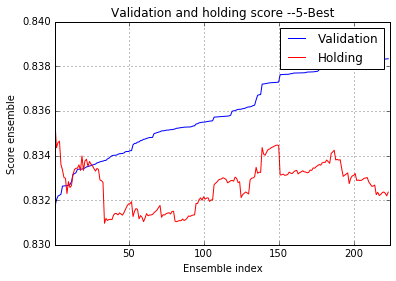

In [51]:
draw_curve(path=setepwise_paths[0],name="5-Best")
#print best_ensmble

{u'GBC_76': 2, u'GBC_74': 6, u'GBC_105': 1, u'GBC_107': 4, u'GBC_117': 2, u'GBC_114': 17, u'GBC_115': 8, u'BAGC_19': 1, u'GBC_34': 3, u'GBC_79': 5, u'KNN_6': 1, u'BAGC_4': 1, u'GBC_1': 2, u'GBC_91': 1, u'GBC_113': 2, u'KNN_50': 3, u'LR_36': 1, u'DTC_42': 1, u'ETC_209': 1} :: 0.83728063214 :: 0.834468769753


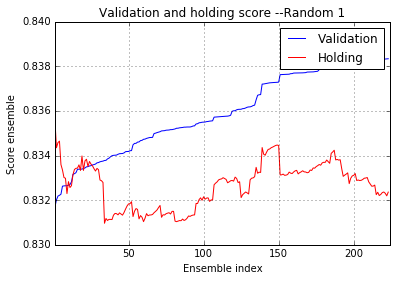

In [52]:
draw_curve(path=setepwise_paths[1],name="Random 1")
#print best_ensmble

{u'GBC_76': 2, u'GBC_74': 6, u'GBC_105': 1, u'GBC_107': 4, u'GBC_117': 2, u'GBC_114': 17, u'GBC_115': 8, u'BAGC_19': 1, u'GBC_34': 3, u'GBC_79': 5, u'KNN_6': 1, u'BAGC_4': 1, u'GBC_1': 2, u'GBC_91': 1, u'GBC_113': 2, u'KNN_50': 3, u'LR_36': 1, u'DTC_42': 1, u'ETC_209': 1} :: 0.83728063214 :: 0.834468769753


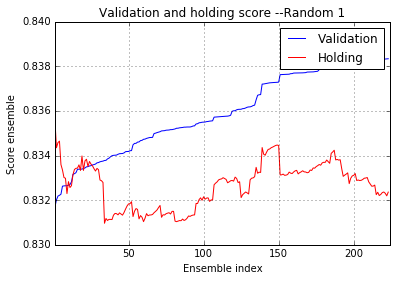

In [54]:
draw_curve(path=setepwise_paths[2],name="Random 1")

{u'GBC_76': 2, u'BAGC_15': 3, u'GBC_74': 6, u'GBC_19': 2, u'GBC_105': 1, u'GBC_107': 8, u'GBC_117': 2, u'ETC_323': 1, u'GBC_115': 8, u'GBC_113': 1, u'GBC_34': 3, u'GBC_79': 5, u'BAGC_4': 1, u'KNN_50': 2, u'GBC_114': 13, u'DTC_42': 1, u'LR_36': 1} :: 0.837615785809 :: 0.834589300309


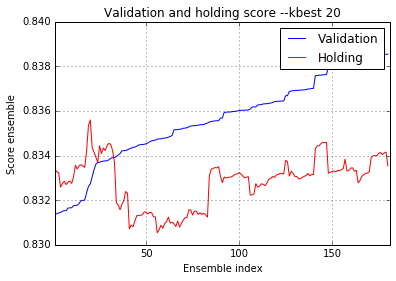

In [48]:
draw_curve(path=setepwise_paths[3],name="kbest 20")

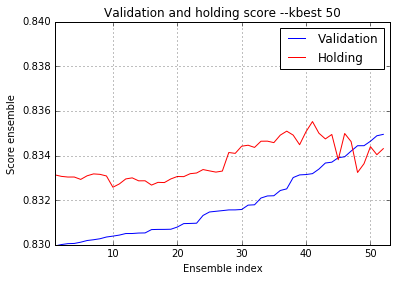

In [54]:
draw_curve(path=setepwise_paths[4],name="kbest 50")

<font style="font-size:1.2em;color:blue;">The Best ensemble is :</font>

In [4]:
best_ensemble={u'GBC_76': 2, u'GBC_74': 6, u'GBC_105': 1, u'GBC_107': 4, u'GBC_117': 2, u'GBC_114': 17,\
               u'GBC_115': 8, u'BAGC_19': 1, u'GBC_34': 3, u'GBC_79': 5, u'KNN_6': 1, u'BAGC_4': 1,\
               u'GBC_1': 2, u'GBC_91': 1, u'GBC_113': 2, u'KNN_50': 3, u'LR_36': 1, u'DTC_42': 1, u'ETC_209': 1}
best_ensemble_intersect={'BAGC_15': 1, 'GBC_74': 2, 'GBC_1': 2, 'GBC_114': 3, 'GBC_22': 1, 'GBC_115': 2, 'GBC_79': 2}

best_ensemble4={u'GBC_76': 2, u'BAGC_15': 3, u'GBC_74': 6, u'GBC_19': 2, u'GBC_105': 1, u'GBC_107': 8, u'GBC_117': 2,\
 u'ETC_323': 1, u'GBC_115': 8, u'GBC_113': 1, u'GBC_34': 3, u'GBC_79': 5, u'BAGC_4': 1, u'KNN_50': 2,\
 u'GBC_114': 13, u'DTC_42': 1, u'LR_36': 1}

best_ensemble4_intersect={'BAGC_15': 1, 'GBC_74': 2, 'GBC_115': 2, 'GBC_114': 3, 'GBC_22': 1, 'GBC_79': 2, 'GBC_26': 1, 'GBC_19': 1}
best_test={'BAGC_15': 1, 'GBC_74': 2, 'GBC_115': 2, 'GBC_114': 3, 'GBC_22': 1, 'GBC_79': 2, 'GBC_1': 2, 'GBC_19': 1}
best_50_best={'BAGC_15': 1, 'GBC_74': 1, 'GBC_115': 1, 'GBC_114': 2, 'GBC_22': 1, 'GBC_112': 1,\
              'GBC_79': 1, 'GBC_19': 1}#0.820488
best_f={'BAGC_15': 1, 'GBC_74': 1, 'GBC_115': 2, 'GBC_114': 2, 'GBC_22': 1, 'GBC_34': 1, 'GBC_79': 1, 'GBC_19': 1, 'LR_36': 1}

Construction the test ensmble

In [5]:
test1=pd.read_csv("results/result_proba_test1.csv")
test2=pd.read_csv("results/result_proba_test2.csv")
test3=pd.read_csv("results/result_proba_test3.csv")

coresp_data={'ETC':'test1','RFC':'test2','BAGC':'test2','DTC':'test2','LR':'test3', 'KNN':'test3', 'GBC':'test3'}

In [65]:
#pridect_ensemble=None
best_ensemble=best_test
new_data=pd.DataFrame()
for model in best_ensemble.keys():
    #print model
    data=coresp_data[model.split("_")[0]]
    col=None
    #print data
    if data=="test1":
        col=test1[model]
    if data=="test2":
        col=test2[model]
    if data=="test3":
        col=test3[model]
    new_data[model]=best_ensemble[model]*col # weight* (proba model)
    #if pridect_ensemble is None:
        #pridect_ensemble=best_ensemble[model]*col # weight* (proba model)
    #else:
        #pridect_ensemble+=best_ensemble[model]*col # weight* (proba model)
    #print pridect_ensemble[1]
#predict_ensemble/=float(sum(best_ensemble.values())) # Mean of probas
#type(predict_ensemble)

sum_proba= new_data.apply(lambda row: sum(row), axis=1)
mean_proba= new_data.apply(lambda row: sum(row)/float(sum(best_ensemble.values())), axis=1)
target= new_data.apply(lambda row: 1 if (sum(row)/float(sum(best_ensemble.values())))>=0.5 else 0, axis=1)
new_data['sum_proba'] =sum_proba
new_data['TARGET'] =mean_proba
new_data['TARGET_01'] =target

In [66]:
new_data['ID']=pd.read_csv("results/test_id.csv").ID

In [67]:
new_data.head()

,BAGC_15,GBC_74,GBC_22,LR_36,GBC_114,GBC_115,GBC_19,GBC_34,GBC_79,sum_proba,TARGET,TARGET_01,ID
0,0.03,0.03,0.03,0.55,0.06,0.04,0.03,0.02,0.03,0.82,0.074545,0,2
1,0.04,0.03,0.04,0.56,0.08,0.08,0.04,0.03,0.04,0.94,0.085455,0,5
2,0.01,0.00,0.00,0.54,0.00,0.00,0.00,0.00,0.00,0.55,0.050000,0,6
3,0.02,0.01,0.01,0.54,0.02,0.00,0.01,0.02,0.01,0.64,0.058182,0,7
4,0.01,0.00,0.00,0.54,0.00,0.00,0.00,0.00,0.00,0.55,0.050000,0,9


In [68]:
new_data.to_csv("results/submit0_best_f.csv",index=False,columns=['ID','TARGET'])


<font style="color:red;font-size:1.2em;">Test kaggle Score<font>

<font style="color:green;font-size:1.3em;">Best ensmble 1</font>

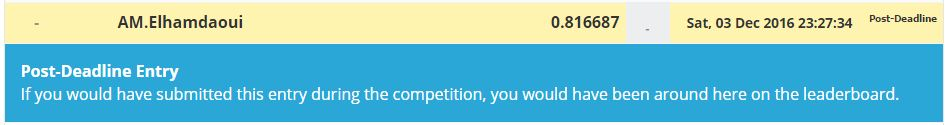

In [11]:
Image(filename="submit/1fst.jpg")

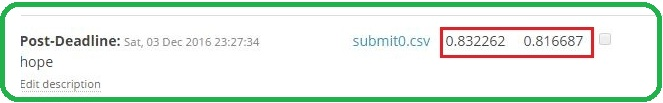

In [13]:
Image(filename="submit/frst.jpg")

<font style="color:green;font-size:1.3em;">Best ensmble 1 intersect </font>

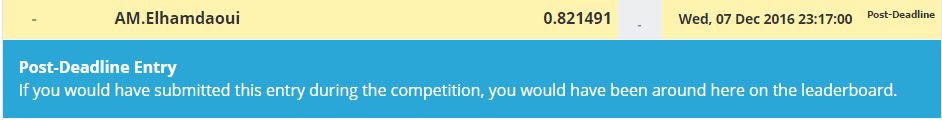

In [36]:
Image(filename="submit/bestintersect.png")

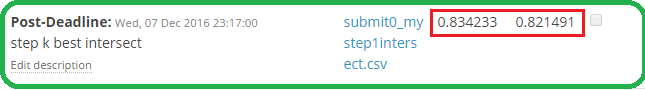

In [37]:
Image(filename="submit/bestintersectPublic.png")

<font style="color:green;font-size:1.3em;">Best ensemble 2</font>

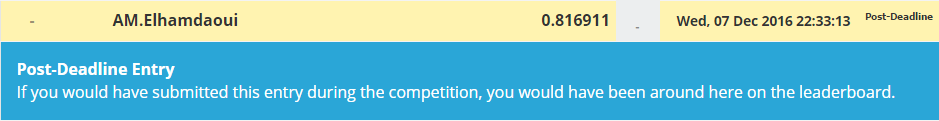

In [19]:
Image(filename="submit/second.png")

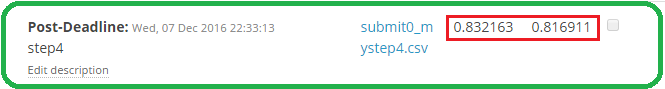

In [20]:
Image(filename="submit/secondpublic.png")

<font style="color:green;font-size:1.3em;">Best ensemble4 intersect</font>

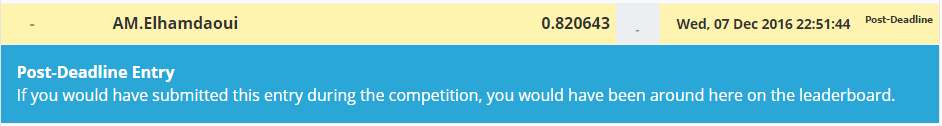

In [26]:
Image(filename="submit/secondintersect.PNG")

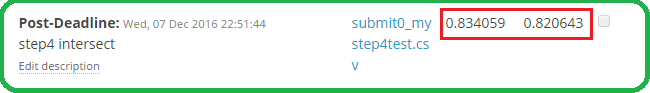

In [27]:
Image(filename="submit/secondintersectPublic.PNG")

<font style="color:green;font-size:1.3em;">Best ensemble4 max holding (best_test)</font>

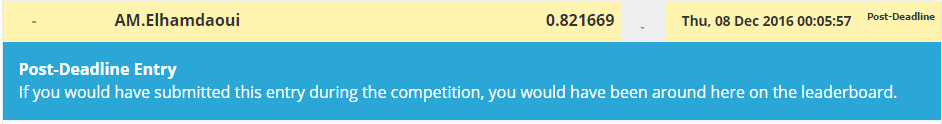

In [61]:
Image(filename="submit/besttest.PNG")

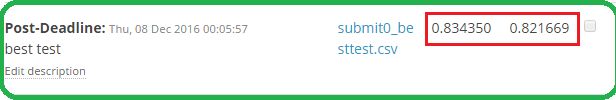

In [63]:
Image(filename="submit/besttestPublic.PNG")

<font style="font-size:1.3em;color:blue;">Probability Calibration curves</font>

In [10]:
#pridect_ensemble=None
new_data=pd.DataFrame()
for model in best_ensemble.keys():
    new_data[model]=best_ensemble[model]*X_validation[model] # weight* (proba model)

sum_proba= new_data.apply(lambda row: sum(row), axis=1)
mean_proba= new_data.apply(lambda row: sum(row)/float(sum(best_ensemble.values())), axis=1)
target= new_data.apply(lambda row: 1 if (sum(row)/float(sum(best_ensemble.values())))>=0.5 else 0, axis=1)
new_data['sum_proba'] =sum_proba
new_data['TARGET'] =mean_proba
new_data['TARGET_01'] =target

In [12]:

from sklearn.metrics import brier_score_loss, precision_score, recall_score,f1_score
from sklearn.calibration import CalibratedClassifierCV, calibration_curve


def plot_calibration_curve( name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    g = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    
    prob_pos = new_data['TARGET']
    y_test= Y_validation#Y_holding
    y_pred= new_data['TARGET_01']
    clf_score = brier_score_loss(y_test, prob_pos, pos_label=1)#pos_label=y.max()
    print("%s:" % name)
    print("\tBrier: %1.3f" % (clf_score))
    print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
    print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
    print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",label="%s (%1.3f)" % (name, clf_score))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name, histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()
    plt.show()

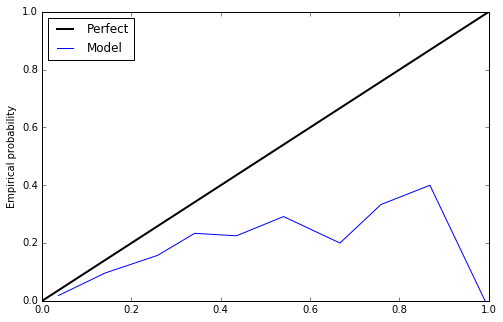

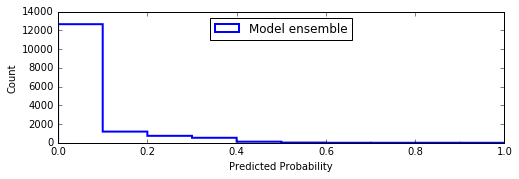

In [25]:
bins=10
y_true=Y_validation
y_score=new_data['TARGET']
def reliability_curve(y_true, y_score, bins=10, normalize=False):
    if normalize:  # Normalize scores into bin [0, 1]
        y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())

    bin_width = 1.0 / bins
    bin_centers = np.linspace(0, 1.0 - bin_width, bins) + bin_width / 2

    y_score_bin_mean = np.empty(bins)
    empirical_prob_pos = np.empty(bins)
    for i, threshold in enumerate(bin_centers):
        # determine all samples where y_score falls into the i-th bin
        bin_idx = np.logical_and(threshold - bin_width / 2 < y_score,
                                 y_score <= threshold + bin_width / 2)
        # Store mean y_score and mean empirical probability of positive class
        y_score_bin_mean[i] = y_score[bin_idx].mean()
        empirical_prob_pos[i] = y_true[bin_idx].mean()
    return y_score_bin_mean, empirical_prob_pos

plt.figure(0, figsize=(8, 8),)
plt.subplot2grid((3, 1), (0, 0), rowspan=2)
plt.plot([0.0, 1.0], [0.0, 1.0], 'k', label="Perfect",linewidth=2 )
y_score_bin_mean, empirical_prob_pos= reliability_curve(y_true, y_score, bins=10, normalize=True)
scores_not_nan = np.logical_not(np.isnan(empirical_prob_pos))
plt.plot(y_score_bin_mean[scores_not_nan],empirical_prob_pos[scores_not_nan], label="Model ensemble", linewidth=2)
plt.ylabel("Empirical probability")
plt.legend(loc=0)
plt.show()
plt.figure(0, figsize=(8, 8))
plt.subplot2grid((3, 1), (2, 0))
y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())
plt.hist(y_score, range=(0, 1), bins=bins, label="Model ensemble",histtype="step", lw=2)
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.legend(loc='upper center', ncol=2)

plt.show()

Calibration by CalibratedClassifierCV

In [4]:
from sklearn.calibration import CalibratedClassifierCV

In [17]:
#calibCv=CalibratedClassifierCV(base_estimator=linear_model.LogisticRegression(), method='sigmoid', cv=3)
calibCv=linear_model.LogisticRegression()

In [18]:
best_ensemble=best_test
X_valid=pd.DataFrame()
X_hold=pd.DataFrame()
for model in best_ensemble.keys():
    #print model
    X_valid[model]=best_ensemble[model]*X_validation[model]
    X_hold[model]=best_ensemble[model]*X_holding[model]

In [19]:
calibCv.fit(X_valid,Y_validation)
pred_prbs_hold=calibCv.predict_proba(X_hold)[:, 1]

In [9]:
fprv,tprv,llv=metrics.roc_curve(Y_holding, pred_prbs_hold)
metrics.auc(fprv, tprv)

0.82950009259967539

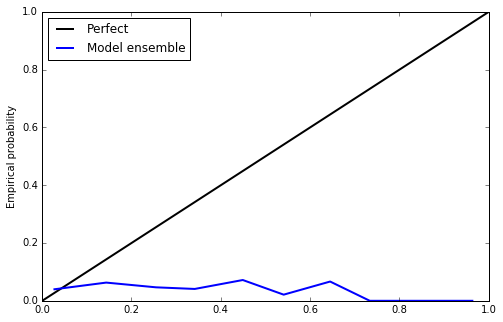

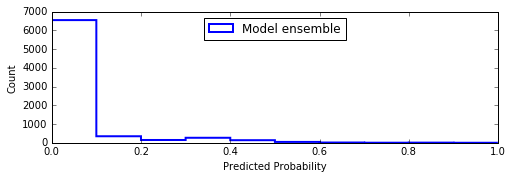

In [20]:
#courbe

from sklearn.metrics import brier_score_loss, precision_score, recall_score,f1_score
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

bins=10
y_true=Y_validation
y_score=pred_prbs_hold
def reliability_curve(y_true, y_score, bins=10, normalize=False):
    if normalize:  # Normalize scores into bin [0, 1]
        y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())

    bin_width = 1.0 / bins
    bin_centers = np.linspace(0, 1.0 - bin_width, bins) + bin_width / 2

    y_score_bin_mean = np.empty(bins)
    empirical_prob_pos = np.empty(bins)
    for i, threshold in enumerate(bin_centers):
        # determine all samples where y_score falls into the i-th bin
        bin_idx = np.logical_and(threshold - bin_width / 2 < y_score,
                                 y_score <= threshold + bin_width / 2)
        # Store mean y_score and mean empirical probability of positive class
        y_score_bin_mean[i] = y_score[bin_idx].mean()
        empirical_prob_pos[i] = y_true[bin_idx].mean()
    return y_score_bin_mean, empirical_prob_pos

plt.figure(0, figsize=(8, 8),)
plt.subplot2grid((3, 1), (0, 0), rowspan=2)
plt.plot([0.0, 1.0], [0.0, 1.0], 'k', label="Perfect",linewidth=2 )
y_score_bin_mean, empirical_prob_pos= reliability_curve(y_true, y_score, bins=10, normalize=True)
scores_not_nan = np.logical_not(np.isnan(empirical_prob_pos))
plt.plot(y_score_bin_mean[scores_not_nan],empirical_prob_pos[scores_not_nan], label="Model ensemble", linewidth=2)
plt.ylabel("Empirical probability")
plt.legend(loc=0)
plt.show()
plt.figure(0, figsize=(8, 8))
plt.subplot2grid((3, 1), (2, 0))
y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())
plt.hist(y_score, range=(0, 1), bins=bins, label="Model ensemble",histtype="step", lw=2)
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.legend(loc='upper center', ncol=2)

plt.show()

<font style="font-size:1.3em;color:blue;">Transform the Probabilies To Calibrated Probabilies</font>

In [6]:
best_ensemble=best_test
valid_p=pd.DataFrame()
for model in best_ensemble.keys():
    valid_p[model]=best_ensemble[model]*X_validation[model] # weight* (proba model)

sum_proba= valid_p.apply(lambda row: sum(row), axis=1)
mean_proba= valid_p.apply(lambda row: sum(row)/float(sum(best_ensemble.values())), axis=1)
target= valid_p.apply(lambda row: 1 if (sum(row)/float(sum(best_ensemble.values())))>=0.5 else 0, axis=1)
valid_p['sum_proba'] =sum_proba
valid_p['TARGET'] =mean_proba
valid_p['TARGET_01'] =target

In [7]:
best_ensemble=best_test
hold_p=pd.DataFrame()
for model in best_ensemble.keys():
    hold_p[model]=best_ensemble[model]*X_holding[model] # weight* (proba model)

sum_proba= hold_p.apply(lambda row: sum(row), axis=1)
mean_proba= hold_p.apply(lambda row: sum(row)/float(sum(best_ensemble.values())), axis=1)
target= hold_p.apply(lambda row: 1 if (sum(row)/float(sum(best_ensemble.values())))>=0.5 else 0, axis=1)
hold_p['sum_proba'] =sum_proba
hold_p['TARGET'] =mean_proba
hold_p['TARGET_01'] =target

In [8]:
from sklearn.isotonic import IsotonicRegression as IR

ir = IR( out_of_bounds = 'clip' )
ir.fit( valid_p['TARGET'], Y_validation )
#p_calibrated = ir.transform( p_test )   # or ir.fit( p_test ), that's the same thing

IsotonicRegression(increasing=True, out_of_bounds='clip', y_max=None,
          y_min=None)

In [17]:

p_test=pd.read_csv("results/submit0_besttest.csv")
#p_calibrated_h=ir.transform( p_test['TARGET'])
#
p_test["TARGET_0"]=p_test["TARGET"]
p_test["TARGET"]=ir.transform( p_test['TARGET'])
p_test.to_csv("results/ssubmit0_besttest_calib.csv",index=False,columns=['ID','TARGET'])
p_test.head()
#0.820158 pivate in kaggle

,ID,TARGET,TARGET_0
0,2,0.025909,0.028571
1,5,0.047369,0.038571
2,6,0.000849,0.000714
3,7,0.004865,0.009286
4,9,0.000849,0.000714


In [ ]:
#----------------------------------------The End ---------------------------------#

In [11]:
ID=pd.read_csv("results/test_id.csv").ID

In [19]:
new_data=pd.DataFrame()
for model in best_ensemble.keys():
    #print model
    data=coresp_data[model.split("_")[0]]
    col=None
    #print data
    if data=="test1":
        col=test1[model]
    if data=="test2":
        col=test2[model]
    if data=="test3":
        col=test3[model]
    new_data[model]=best_ensemble[model]*col 
new_data["TARGET"]=calibCv.predict_proba(new_data)[:, 1]
new_data['ID']=ID

In [20]:
new_data.to_csv("results/submit_calib.csv",index=False,columns=['ID','TARGET'])